In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

### Step 1: Data Preprocessing

In [11]:
# Load the data
df = pd.read_csv('Dataset.csv')

In [12]:
# Handle missing values
df = df.dropna()

In [15]:
# Apply feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

### Step 2: Exploratory Data Analysis (EDA)

In [16]:
# Basic statistics
print(df.describe())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8636.000000        8636.000000   8636.000000       8636.000000   
mean    1601.224893           0.895035   1025.433874        604.901438   
std     2095.571300           0.207697   2167.107984       1684.307803   
min        0.000000           0.000000      0.000000          0.000000   
25%      148.095189           0.909091     43.367500          0.000000   
50%      916.855459           1.000000    375.405000         44.995000   
75%     2105.195853           1.000000   1145.980000        599.100000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8636.000000   8636.000000          8636.000000   
mean               420.843533    994.175523             0.496000   
std                917.245182   2121.458303             0.401273   
min                  0.000000      0.000000             0.000

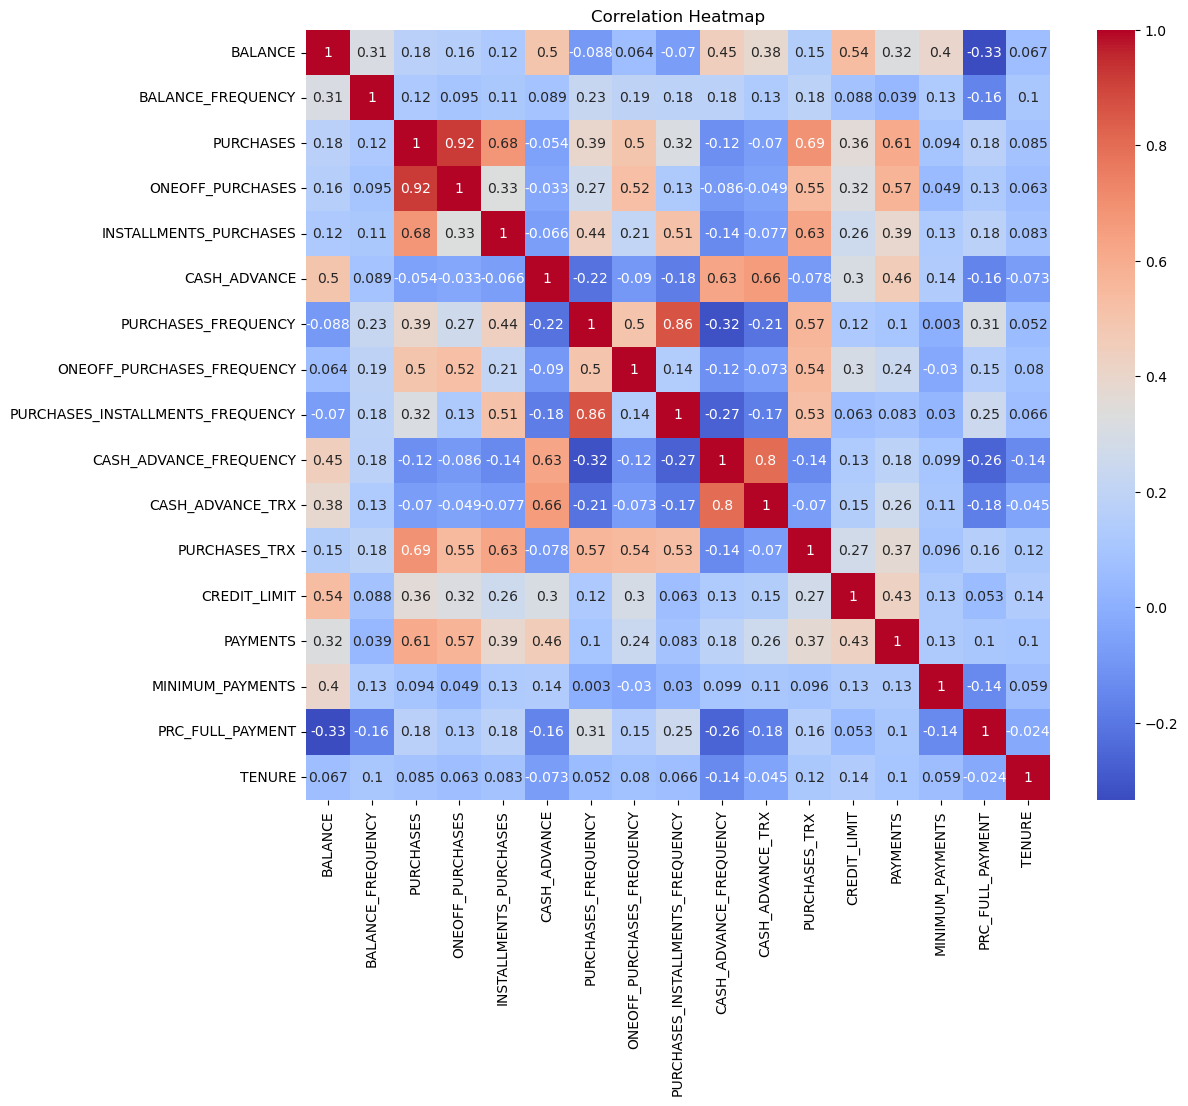

In [19]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
# Remove the 'CUST_ID' column from the correlation calculation.
sns.heatmap(df.drop('CUST_ID', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

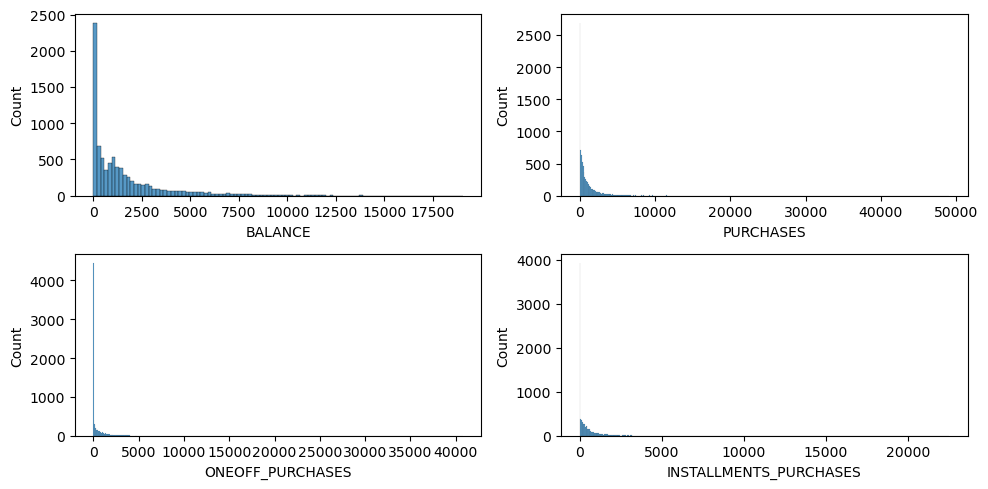

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')


In [24]:
# Distribution of a few key features 
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.histplot(df['BALANCE'], ax=axes[0, 0])  
sns.histplot(df['PURCHASES'], ax=axes[0, 1])  
sns.histplot(df['ONEOFF_PURCHASES'], ax=axes[1, 0]) 
sns.histplot(df['INSTALLMENTS_PURCHASES'], ax=axes[1, 1]) 
plt.tight_layout()
plt.show()

# To verify the available columns in your DataFrame
print(df.columns)

### Step 3: Clustering

In [25]:
# K-Means Clustering
kmeans_scores = []
max_clusters = 10

In [27]:
for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    kmeans_scores.append(score)

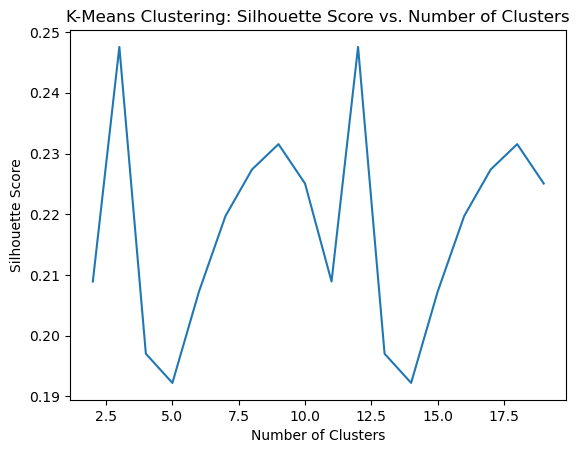

In [33]:
# Assuming the mismatch is due to incorrect length of kmeans_scores
max_clusters = len(kmeans_scores) + 1  # Adjust max_clusters accordingly

plt.plot(range(2, max_clusters + 1), kmeans_scores[:max_clusters-1])
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('K-Means Clustering: Silhouette Score vs. Number of Clusters')
plt.show()


In [34]:
# Choose optimal number of clusters (example: 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

In [36]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)

### Step 4: Cluster Profiling

In [37]:
df['KMeans_Cluster'] = kmeans_labels
df['DBSCAN_Cluster'] = dbscan_labels

In [39]:
# Profile K-Means clusters
for i in range(optimal_clusters):
    cluster_data = df[df['KMeans_Cluster'] == i]
    print(f"K-Means Cluster {i} Profile:")
    print(cluster_data.describe())
    print("\n")

K-Means Cluster 0 Profile:
            BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count   1155.000000        1155.000000  1155.000000       1155.000000   
mean    4654.668634           0.969185   504.585671        319.242797   
std     2768.467027           0.089417   865.727150        663.983473   
min       78.114579           0.181818     0.000000          0.000000   
25%     2526.512820           1.000000     0.000000          0.000000   
50%     4345.879999           1.000000    91.840000          0.000000   
75%     6306.663776           1.000000   660.355000        329.875000   
max    16304.889250           1.000000  7194.530000       6678.260000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              1155.00000   1155.000000          1155.000000   
mean                185.43090   4588.716197             0.290148   
std                 422.08237   3656.186860             0.355639   
min                   0.00000      0.000000

In [41]:
# Profile DBSCAN clusters
for i in set(dbscan_labels):
    cluster_data = df[df['DBSCAN_Cluster'] == i]
    print(f"DBSCAN Cluster {i} Profile:")
    print(cluster_data.describe())
    print("\n")

DBSCAN Cluster 0 Profile:
           BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  1689.000000        1689.000000  1689.000000       1689.000000   
mean   1067.855018           0.997363   200.010355         62.190379   
std     945.297852           0.018457   266.104804        172.088513   
min       1.591980           0.727273     0.000000          0.000000   
25%     256.028048           1.000000     0.000000          0.000000   
50%    1001.129965           1.000000    81.100000          0.000000   
75%    1493.440295           1.000000   330.000000         26.120000   
max    5941.847384           1.000000  1627.000000       1627.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1689.000000   1689.000000          1689.000000   
mean               137.907164    276.651202             0.332840   
std                231.622736    490.209178             0.403820   
min                  0.000000      0.000000          

In [61]:
# Visualize clusters 
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'K-Means Clustering')

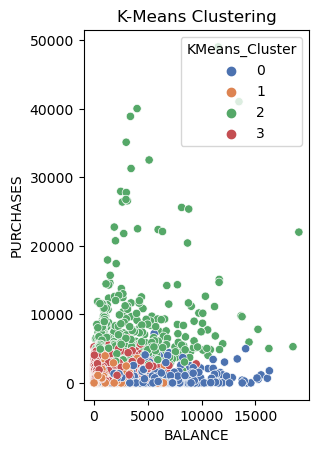

In [62]:
plt.subplot(121)
sns.scatterplot(data=df, x='BALANCE', y='PURCHASES', hue='KMeans_Cluster', palette='deep')
plt.title('K-Means Clustering')

Text(0.5, 1.0, 'DBSCAN Clustering')

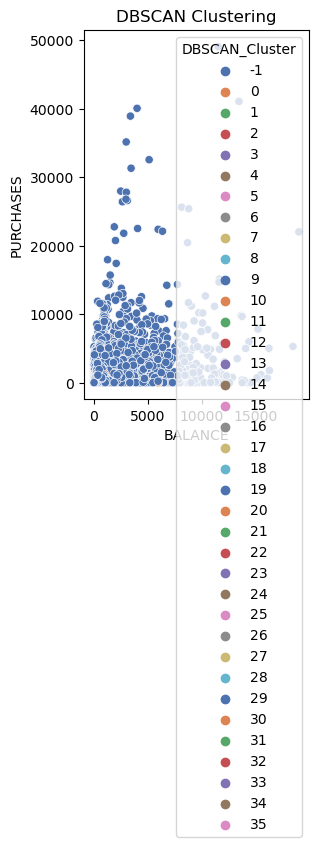

In [63]:
plt.subplot(122)
sns.scatterplot(data=df, x='BALANCE', y='PURCHASES', hue='DBSCAN_Cluster', palette='deep')
plt.title('DBSCAN Clustering')

In [64]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

### Step 5: PCA

In [66]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

In [67]:
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

In [68]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'K-Means Clustering after PCA')

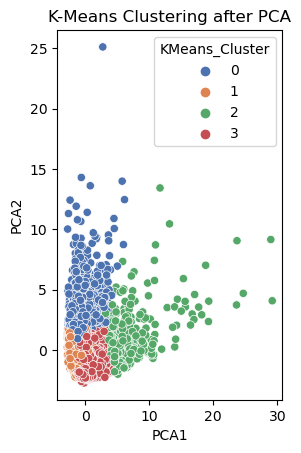

In [70]:
plt.subplot(121)
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='deep')
plt.title('K-Means Clustering after PCA')

Text(0.5, 1.0, 'DBSCAN Clustering after PCA')

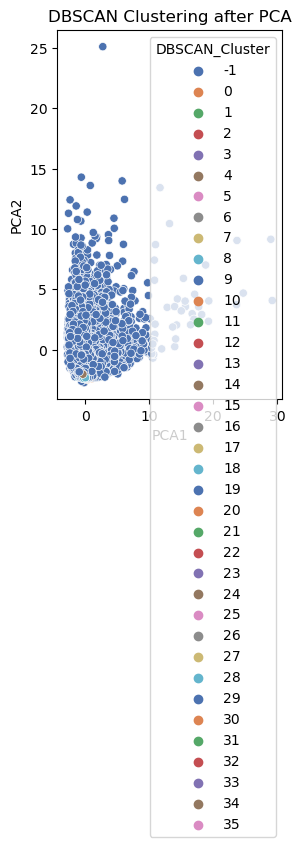

In [72]:
plt.subplot(122)
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='deep')
plt.title('DBSCAN Clustering after PCA')

In [73]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [74]:
# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.27231177 0.20374308]
